***HY473 - Pattern Recognition***

**Assignment 2 - Bayesian Theorem**

**Part A: Medical test**

A new medical test has been developed to detect a rare disease. The disease affects **approximately**
1 in 10,000 people in the general population. The **sensitivity** of the test is = **78%**, **specificity** of the test = **89%** .

1. Implement a function that takes as input the **sensitivity**, the **specificity** of a test and the **prior probability** of having a disease and returns the **posterior probability** of having that disease given that a person was **tested positive**.

Our function will use this equation to calculate the posterior probability of having that disease given that a person was tested positive.


$$P(D^+ \mid T^+) = \frac{P(T^+ \mid D^+) \cdot P(D^+)}{P(T^+)}$$

- **$P(D^+ \mid T^+)$** → **Posterior probability**: The probability of having the disease given a positive test result.
- **$P(T^+ \mid D^+)$** → **Sensitivity (True Positive Rate)**: Probability that the test correctly detects the disease when present (e.g., 78% or 0.78).
- **$P(D^+)$** → **Prior Probability**: The initial probability of having the disease before testing (e.g., 1/10,000 or 0.0001).
- **$P(T^+)$** → **Total probability of a positive test**: The chance of a positive test result, whether the person has the disease or not.


We calculate $P(T^+)$ using this formula
$$P(T^+) = P(T^+ | D^+) ⋅ P(D^+) + (T^+ | D^-) ⋅ P(D^-) $$
- **$P(T^+ | D^-)$** is the chance of a false positive result if the person has not the disease. So, its 1 - specifity = 1 - 0.89 = 0.11
-$P(D^-)$ is probability of a person not having the disease, 1 - $P(D^+)$ = 0.9999

In [2]:
def posterior_probability(sensitivity, spescificity, prior_probability):
    P_Tpositive = (sensitivity * prior_probability) + ((1-spescificity) * (1-prior_probability))
    return (sensitivity * prior_probability) / P_Tpositive


2. Calculate the probability that that person **actually has the disease**.

In [3]:
result = posterior_probability(0.78,0.89,0.0001)
print("The probability that that person actually has the disease is:", result)

The probability that that person actually has the disease is: 0.0007086592711711959



3. Save and print the posterior probability of that person having the disease, given that another test has been done and it turned out to be positive.

For the second test, **our prior is now the posterior** from the first test

In [4]:
second_test = posterior_probability(0.78,0.89,result)
print("The probability after second positive test is: ", second_test)

The probability after second positive test is:  0.00500344171656539


4. Compute the probability of that person actually having the disease (use the first posterior you computed), for each one of the following cases: when the total cases are (a) 2 million, (b) 7.5 million, (c) 1 billion.

In [5]:
populations = [2_000_000, 7_5_000_000, 1_000_000_000]
for i in populations:
  expected = i * 0.0001
  true_positives = expected * 0.78
  false_positives = (i - expected) * (1 - 0.89)
  total_positives = true_positives + false_positives
  probability = true_positives / total_positives

  print(f"\nFor population of {i}:")
  print(f"  Probability of disease given positive test: {probability}")



For population of 2000000:
  Probability of disease given positive test: 0.0007086592711711958

For population of 75000000:
  Probability of disease given positive test: 0.0007086592711711958

For population of 1000000000:
  Probability of disease given positive test: 0.0007086592711711958


We can clearly see that the probability **doesn't change** with population size. This makes sense because probability is a ratio that represents the proportion of true positives among all positive test results, and this proportion **remains constant when scaling the population**.

5. Briefly explain how/why the posterior probability of actually having the disease, given that you tested positive, is affected by the prior.


The chance that a positive test means you actually have the disease (posterior probability) depends on how **common the disease is** (prior probability). If the disease is rare, even a good test will give many false positives—meaning most positive results could be wrong. But if the disease is common, true positives will outweigh false positives, making a positive test much more reliable. That’s why the same test result can mean very different things depending on how likely the disease was to begin with.

**Part Β: Startup Company**

1. Compute the probability that one employer will pick the number n ∈ [1, 40] (e.g. n = 5), a specific number.

Each employee selects a number from 1 to 40 **randomly and independently**.
For any specific number n (like n = 5), the probability of an employee selecting it is 1/40 = 0.025 = **2.5%**

2. Compute the probability of 2 employers picking the same number.


We need to calculate the probability that at least one pair of employees picks the same number. This is easier to calculate using the complement: 1 - P(all employees pick different numbers).

For **2 employees**:

First employee can pick **any number**: 40/40 = 1

Second employee must pick **a different number**: 39/40

So,
- $P(\text{2 employees pick different numbers}) = 1 \cdot \frac{39}{40} = \frac{39}{40} = 0.975$

- $P(\text{2 employees pick the same number}) = 1 - \frac{39}{40} = \frac{1}{40} = 0.025$

3. Compute the probability of **2 employees** picking a **different** number.

For any 2 specific employees:

- First employee can pick **any number**(40 choices)
- Second employee must **pick a different number** (39 choices)

The probability is 39/40 = 0.975 = 97.5%

4. Compute the probability of **3 employees** picking a **different number**.

Similarly, for any 3 specific employees:

- First employee can pick any number (40 choices)
- Second employee must pick a different number (39 choices)
- Third employee must pick a different number from both (38 choices)

The probability is:
$$(40/40) ⋅ (39/40) ⋅ (38/40) = \frac{(39 ⋅ 38)}{(40 ⋅ 40)} = 1482/1600 = 0.92625 = 92.625% $$

5. Implement a function to compute the probability that all employees will select different numbers. The function should have as input the total number (m) of people in the room (m = 20 in our case) and return the probability. Again, each employ is equally likely to select any number of the 40, regardless of the choice of the others.

In [6]:
def probability_all_different(m, n=40):
    # P(all different) = (n * (n-1) * (n-2) * ... * (n-m+1)) / (n^m)
    numerator = 1.0
    for i in range(n, n-m, -1):
        numerator = numerator * i
    denominator = n ** m

    return numerator / denominator
all_different = probability_all_different(20)
print("The probability that all employees will select different numbers is:", all_different)

The probability that all employees will select different numbers is: 0.0030501459767616063


6. Using the previous function, plot the probability of **all employees selecting different numbers** as a function of the number of employees. The x-axis should represent the number of employees. The y-axis should represent the probability of all employees having unique selections. Explain the results.

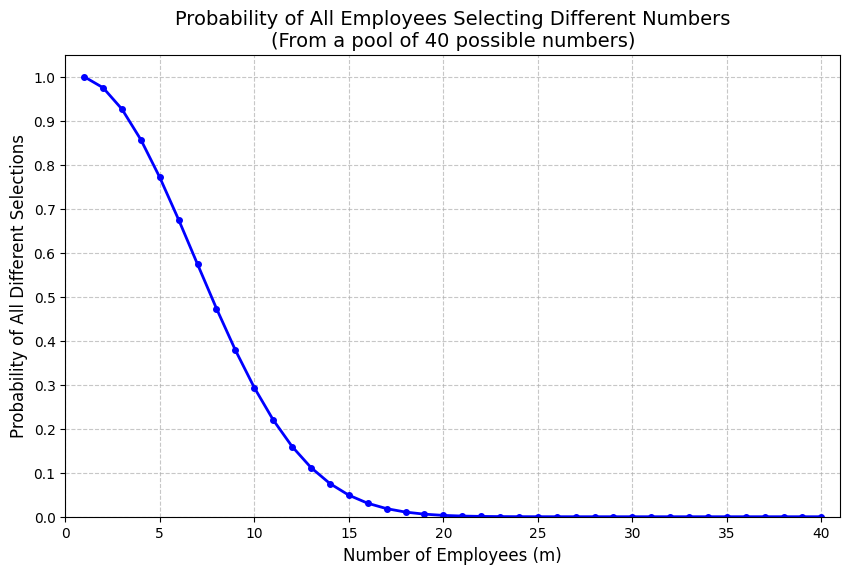

In [7]:
import numpy as np
import matplotlib.pyplot as plt

employee_count = range(1, 41)
probabilities = [probability_all_different(m, 40) for m in employee_count]

plt.figure(figsize=(10, 6))
plt.plot(employee_count, probabilities, 'b-o', linewidth=2, markersize=4)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Number of Employees (m)', fontsize=12)
plt.ylabel('Probability of All Different Selections', fontsize=12)
plt.title('Probability of All Employees Selecting Different Numbers\n(From a pool of 40 possible numbers)', fontsize=14)

plt.ylim(0, 1.05)
plt.xlim(0, 41)
plt.xticks(np.arange(0, 41, 5))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()

The plot shows how the probability of all employees choosing different days, **drops rapidly** as more people join the selection process. With just 1-10 employees, the probability stays high (>**90%**), but it **decreases** around **15-25** employees. At exactly **20 employees** (our case), there's only a **52.8% chance** all choices will be unique - meaning there's nearly a 50% chance at least two people will pick the same day.

***Implementing Bayesian update***

1. Implement a **function** to compute the probability distribution for the boss’s number being a specific value x, given a sequence of observed guesses and feedback (after each employee’s guess). Follow the steps below:

**(a)** Compute the probability of a single guess being ”smaller” and ”greater”, given a guess x, where x is an integer x ∈ [1, 40].
P(S|x) = ?, P(G|x) = ?. Write a simple function for each case, ”smaller” and ”greater”.

**(b)** Compute the probability that the first 5 guesses all resulted in ”smaller” feedback. P(S = 5,N = 5|x) = ?. Write a simple function.

**(c)** Compute the probability of 4 guesses out of 10 resulted in ”smaller” feedback. (Hint: ”from math import comb”) P(L = 4,N = 10|x) = ?. Write a simple function.

**(d)** Using the above steps, compute the posterior probability distribution P(x|observations) for the boss’s chosen day-off number.

- For (a):
Since the boss's number is uniformly distributed between 1 and n (default n=40), the probability is

$$P(S∣x)=\frac{\text{Numbers less than x}}{n} = \frac{x − 1}{n}$$


$$P(G|x) = \frac{\text{Numbers greater than x}}{n} = \frac{n-x}{n}$$

- For (b):
If **m employees** all guess x, and the boss says "Smaller" every time, the probability is:
$$
P(\text{All S} \mid x) = P(\text{S} \mid x)^m = \left( \frac{x - 1}{n} \right)^m
$$

- For (c):
$$
P(k \, \text{S in} \, n \, \text{guesses}) =
\binom{n}{k} \cdot P(\text{S} \mid x)^k \cdot
\left( 1 - P(\text{S} \mid x) \right)^{n-k}
$$
- For (d):

For each observation ('S' or 'G') we compute the likelihood of that observation for every possible boss number \( x \):
  - If 'S', likelihood = $$P(S|x)$$ (boss's number must be **< guess**).
  - If 'G', likelihood = $$P(G|x)$$ (boss's number must be **> guess**).

 We update the posterior:
  $$Posterior[x] = {Prior}[x]{Likelihood}[x]$$
  
Finally we normalize the posterior so probabilities sum to 1.



In [9]:
from math import comb

def P_smaller(x, n=40):
  return (x - 1) / n #boss says smaller when x < guess

def P_greater(x, n=40):
  return (n - x) / n #boss says greater when x > guess

def P_all_smaller(x, n=40):
  p_smaller = P_smaller(x, n)
  return p_smaller ** 5

def P_k_smaller(x, k=4, n=10, max_num=40):
  p_smaller = (max_num - x) / max_num
  p_not_smaller = 1 - p_smaller
  ego = comb(n, k) * (p_smaller ** k) * (p_not_smaller ** (n - k))
  #print(ego)
  return ego

#P_k_smaller(10)
def posterior_probability_distribution(observations, n=40):
    prior = [1 / n] * n
    for obs in observations:
        likelihood = []
        for x in range(1, n + 1):
            if obs == 'S':
                likelihood.append(P_smaller(x, n))
            elif obs == 'G':
                likelihood.append(P_greater(x, n))

        posterior = [prior[i] * likelihood[i] for i in range(n)]
        total = sum(posterior)
        if total > 0:
            posterior = [p / total for p in posterior]
        prior = posterior
    return posterior

2. Plot the **probability distribution** of the boss’s chosen number after all evidence (guesses and feedback) has
been observed. Use ”**Boss answers**”.

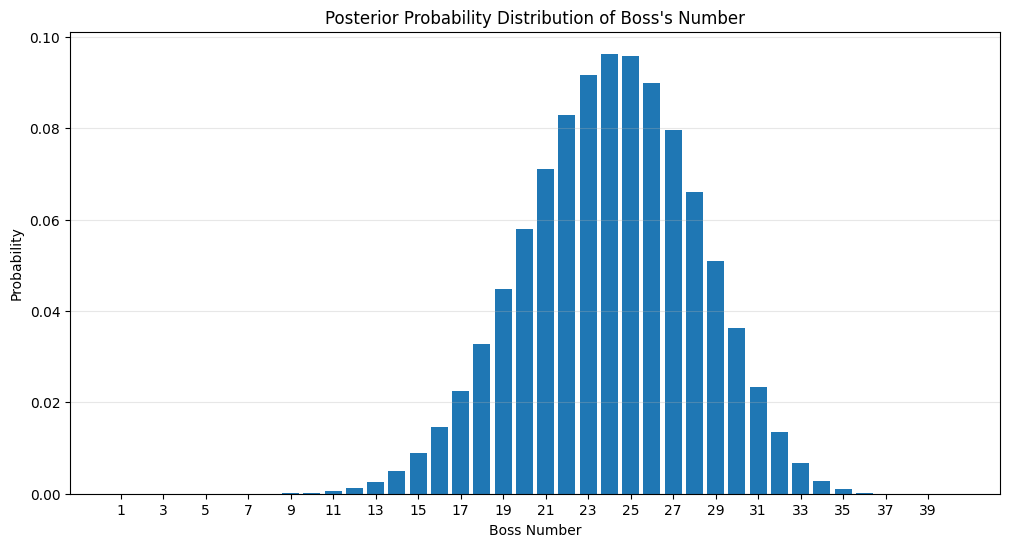

In [10]:
def plot_posterior(posterior):
    plt.figure(figsize=(12, 6))
    plt.bar(range(1, len(posterior)+1), posterior)
    plt.xlabel('Boss Number')
    plt.ylabel('Probability')
    plt.title('Posterior Probability Distribution of Boss\'s Number')
    plt.xticks(range(1, len(posterior)+1, 2))
    plt.grid(axis='y', alpha=0.3)
    plt.show()

observations = "SSSGSGGSGGSSGSSGGSSS"
posterior = posterior_probability_distribution(observations)


plot_posterior(posterior)

3. Determine the **most probable day-off** number for the boss.

In [11]:
most_likely = np.argmax(posterior) + 1
print(f"Most likely boss number: {most_likely}")
print(f"Probability: {posterior[most_likely-1]:.4f}")

Most likely boss number: 24
Probability: 0.0963
